In [3]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [4]:
(train_datas, train_labels), (test_datas, test_labels) = imdb.load_data(
    num_words=10000)

In [12]:
def vectorize_sequences(sequences, dimension=10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        for j in sequence :
            results[i, j] = 1
    return results

In [13]:
x_train = vectorize_sequences(train_datas)
x_test = vectorize_sequences(test_datas)

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [21]:
model.compile(optimizer="rmsprop",
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 9s 170ms/step - loss: 0.5180 - accuracy: 0.7773 - val_loss: 0.3857 - val_accuracy: 0.8620
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3036 - accuracy: 0.9011 - val_loss: 0.3125 - val_accuracy: 0.8805
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2218 - accuracy: 0.9265 - val_loss: 0.3307 - val_accuracy: 0.8627
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1770 - accuracy: 0.9400 - val_loss: 0.2735 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1417 - accuracy: 0.9543 - val_loss: 0.3776 - val_accuracy: 0.8537
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1175 - accuracy: 0.9633 - val_loss: 0.3065 - val_accuracy: 0.8825
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0959 - accuracy: 0.9703 - val_loss: 0.3297 - val_accuracy: 0.8788
Epoch 8/20
3

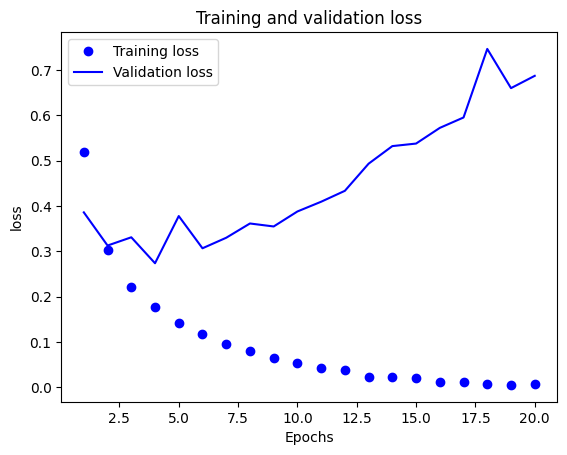

In [27]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
plt.clf()